# Ultimate Technologies Inc. Take-Home Challenge

# Part 3

## Import the Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

## Load and check the data

In [20]:
data =  pd.read_json(r"C:\Users\aasha\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json")

In [22]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [24]:
data.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
data.shape

(50000, 12)

## Convert the date to datetime

In [31]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [33]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

## Calculate retention rate

In [36]:
cutoff_date = pd.to_datetime('2014-06-01')
data['retained'] = data['last_trip_date'] >= cutoff_date
retention_rate = data['retained'].mean()
print(retention_rate)

0.37608


## Visualizations

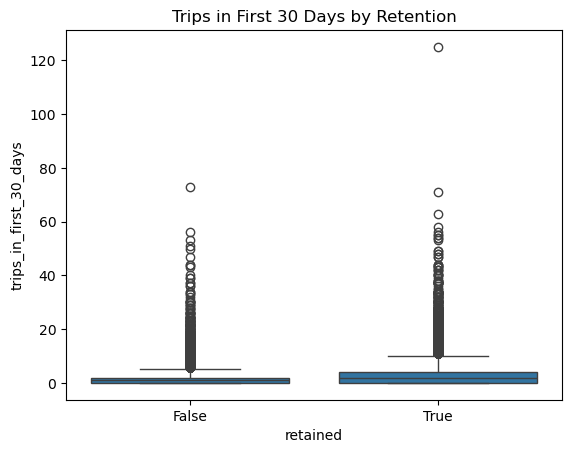

In [39]:
# Trips in first 30 days vs. retention
sns.boxplot(x='retained', y='trips_in_first_30_days', data=data)
plt.title('Trips in First 30 Days by Retention')
plt.show()

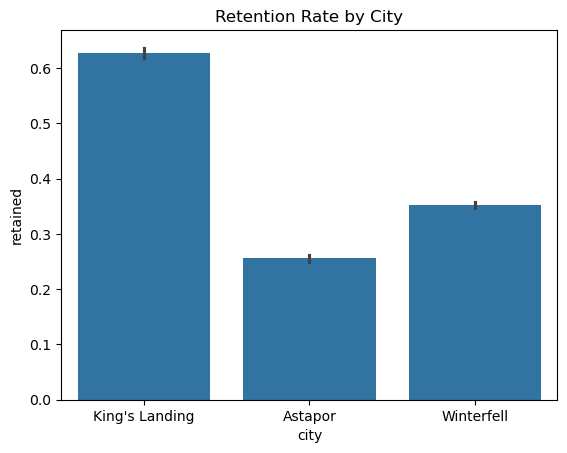

In [41]:
# Retention by city
sns.barplot(x='city', y='retained', data=data)
plt.title('Retention Rate by City')
plt.show()

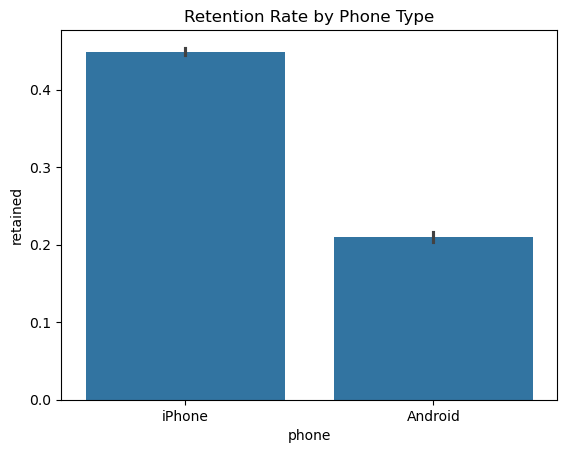

In [43]:
# Retention by phone type
sns.barplot(x='phone', y='retained', data=data)
plt.title('Retention Rate by Phone Type')
plt.show()

## Preprocessing

In [46]:
# Get dummies for categorical features
features = data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                 'surge_pct', 'avg_surge', 'trips_in_first_30_days',
                 'ultimate_black_user', 'weekday_pct', 'city', 'phone']]

features = pd.get_dummies(features, drop_first=True)

# Fill missing values
features.fillna(features.median(), inplace=True)

# Target
target = data['retained']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Modeling

In [49]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7174
ROC AUC: 0.7604234006756558
[[5265  954]
 [1872 1909]]
              precision    recall  f1-score   support

       False       0.74      0.85      0.79      6219
        True       0.67      0.50      0.57      3781

    accuracy                           0.72     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.71      0.72      0.71     10000



## Conclusion

Our logistic regression model achieved an accuracy of 71.7%, meaning it correctly predicted whether a user would be retained or not in about 72% of cases. The ROC AUC score of 0.76 indicates the model has good discriminatory power. It can distinguish between retained and non retained users significantly better than random guessing. Precision for retained users is 0.67, meaning that when the model predicts a user will be retained, it is correct 67% of the time. Recall for retained users is 0.50, which means the model successfully identifies 50% of all actual retained users.These results suggest that even though the model is better at identifying non retained users than retained ones, it still provides a useful foundation for retention prediction.